In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [ ]:
airline=pd.read_excel("/content/sample_data/Airlines+Data.xlsx")
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
airline.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


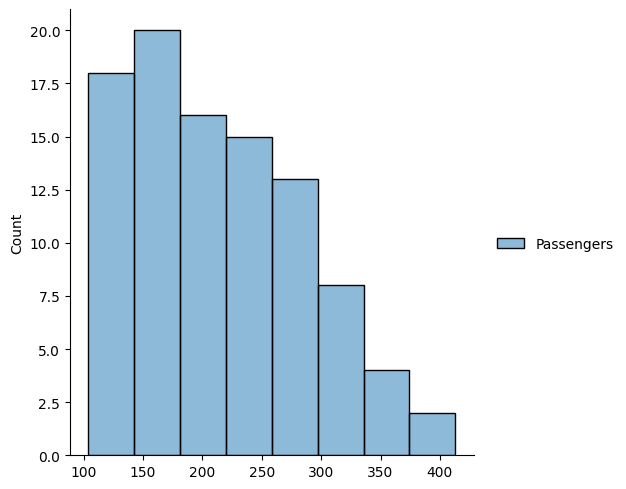

In [ ]:
sns.displot(airline)

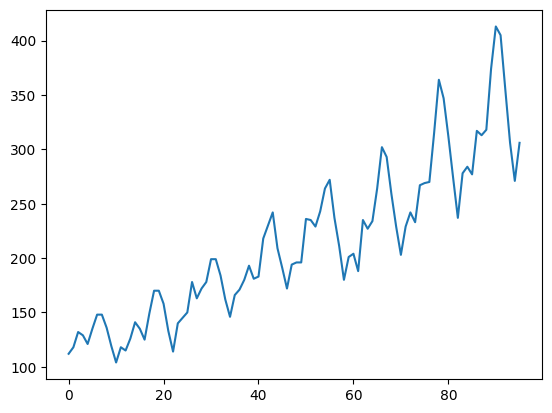

In [ ]:
plt.plot(airline['Passengers'])
plt.show()

<Axes: >

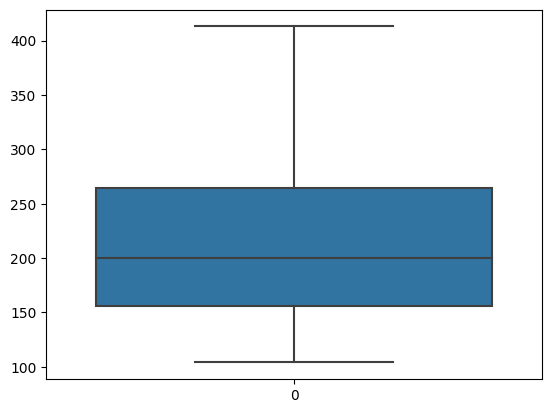

In [ ]:
sns.boxplot(airline['Passengers'])

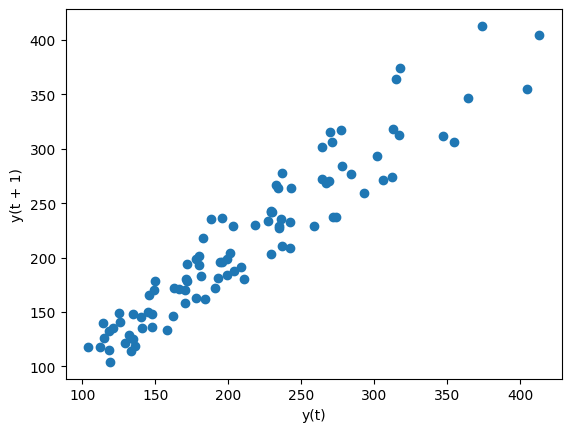

In [ ]:
lag_plot(airline['Passengers'])
plt.show()

<Figure size 400x200 with 0 Axes>

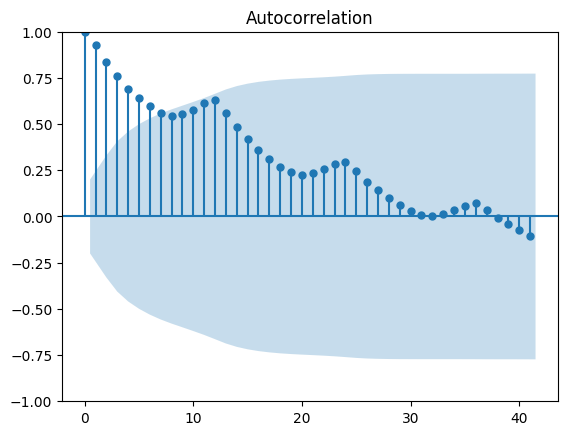

In [ ]:
plt.figure(figsize = (4,2))
plot_acf(airline['Passengers'],lags=41)
plt.show()

In [ ]:
airline["month"] = airline.Month.dt.strftime("%b") # month extraction

In [ ]:
airline['t']=np.arange(1,len(airline)+1)
airline['t_square']=airline['t']**2
airline['log_passangers']=np.log(airline['Passengers'])
airline_OHE=pd.get_dummies(airline,columns=['month'])
airline_OHE.head()

,Month,Passengers,t,t_square,log_passangers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
airline_OHE=airline_OHE.rename({'month_Apr':'Apr','month_Aug':'Aug','month_Dec':'Dec','month_Feb':'Feb','month_Jan':'Jan','month_Jul':'Jul',
	'month_Jun':'Jun','month_Mar':'Mar','month_May':'May','month_Nov':'Nov','month_Oct':'Oct','month_Sep':'Sep'},axis=1)

In [ ]:
airline_OHE.head()

,Month,Passengers,t,t_square,log_passangers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


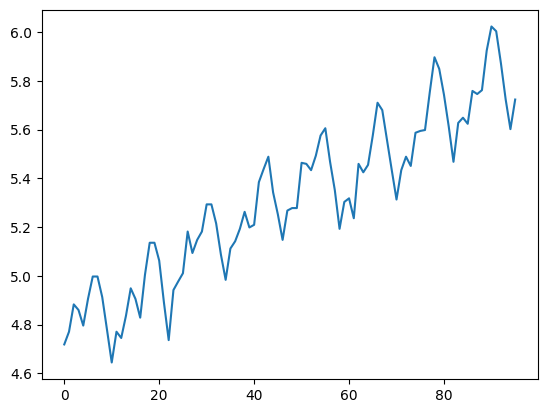

In [ ]:
plt.plot(airline['log_passangers'])
plt.show()

Model

In [ ]:
airline_OHE.shape

(96, 17)

In [ ]:
train=airline_OHE.head(86)
test=airline_OHE.tail(10)

In [ ]:
train.tail()

,Month,Passengers,t,t_square,log_passangers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
81,2001-10-01,274,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0
83,2001-12-01,278,84,7056,5.627621,0,0,1,0,0,0,0,0,0,0,0,0
84,2002-01-01,284,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,Month,Passengers,t,t_square,log_passangers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
86,2002-03-01,317,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
#linear model
linear_model=smf.ols('Passengers~t',data=train).fit()
linear_pred=linear_model.predict(test['t'])
linear_rmse=np.sqrt(mean_squared_error(test['Passengers'],linear_pred))
linear_rmse

58.64314972778256

In [ ]:
#quadratic
quad_model=smf.ols('Passengers~t+t_square',data=train).fit()
quad_pred=quad_model.predict(test[['t','t_square']])
quad_rmse=np.sqrt(mean_squared_error(test['Passengers'],quad_pred))
quad_rmse

53.914363578529574

In [ ]:
#exponential
expo_model=smf.ols('log_passangers~t',data=train).fit()
expo_pred=expo_model.predict(test['t'])
expo_rmse=np.sqrt(mean_squared_error(test['log_passangers'],expo_pred))
expo_rmse

0.14475099238167138

In [ ]:
#additive sea
add_seas_model=smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
add_seas_pred=add_seas_model.predict(test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
add_seas_rmse=np.sqrt(mean_squared_error(test['Passengers'],add_seas_pred))
add_seas_rmse

136.79010436819325

In [ ]:
#Additive Seasonality Quadratic
add_seas_quad_model=smf.ols('Passengers~t+t_square+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
add_seas_quad_pred=add_seas_quad_model.predict(test[['t','t_square','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
add_seas_quad_rmse=np.sqrt(mean_squared_error(test['Passengers'],add_seas_quad_pred))
add_seas_quad_rmse

29.104549899229262

In [ ]:
##Multiplicative Seasonality
mul_seas_model=smf.ols('log_passangers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
mul_seas_pred=mul_seas_model.predict(test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
mul_seas_rmse=np.sqrt(mean_squared_error(test['log_passangers'],mul_seas_pred))
mul_seas_rmse

0.5456837864857802

In [ ]:
#Multiplicative quadratic Seasonality
mul_seas_quad_model=smf.ols('log_passangers~t+t_square+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
mul_seas_quad_pred=mul_seas_quad_model.predict(test[['t','t_square','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
mul_seas_quad_rmse=np.sqrt(mean_squared_error(test['log_passangers'],mul_seas_quad_pred))
mul_seas_quad_rmse

0.050796753163385513

In [ ]:
data={"MODEL":pd.Series(['linear model','quadratic','Exponential','additive sea',
                        'Additive Seasonality Quadratic' ,'Multiplicative Seasonality','Multiplicative quadratic Seasonality']),
      "RMSE SCORE":pd.Series([linear_rmse,quad_rmse,expo_rmse,add_seas_rmse,add_seas_quad_rmse,mul_seas_rmse,mul_seas_quad_rmse])}
data_rmse=pd.DataFrame(data)
data_rmse

,MODEL,RMSE SCORE
0,linear model,58.643150
1,quadratic,53.914364
2,Exponential,0.144751
3,additive sea,136.790104
4,Additive Seasonality Quadratic,29.104550
5,Multiplicative Seasonality,0.545684
6,Multiplicative quadratic Seasonality,0.050797


In [ ]:
airline_OHE['prediction']=mul_seas_quad_model.predict(airline_OHE[['t','t_square','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])


In [ ]:
airline_OHE.head()

,Month,Passengers,t,t_square,log_passangers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,prediction
0,1995-01-01,112,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0,4.674808
1,1995-02-01,118,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0,4.686946
2,1995-03-01,132,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0,4.832743
3,1995-04-01,129,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0,4.798395
4,1995-05-01,121,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0,4.790059


<Axes: >

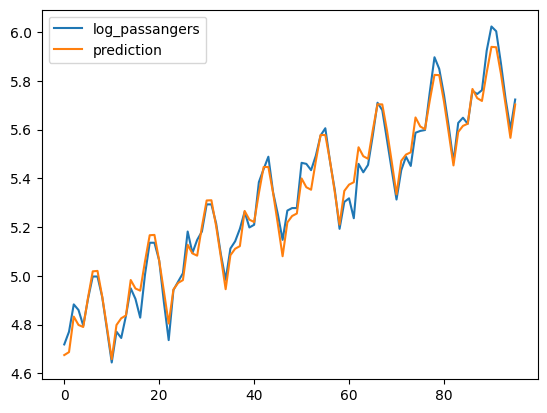

In [ ]:
airline_OHE[['log_passangers','prediction']].reset_index(drop=True).plot()

**ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [ ]:
def evaluate_arima_model(X,arima_order):
  X=X.astype('float32')
  train_size=int(len(X)*0.5)
  train,test=X[0:train_size],X[train_size:]
  history=[x for x in train]
  #prediction
  prediction=list()
  for t in range(len(test)):
    model=ARIMA(history,order=arima_order)
  #model_fit
    model_fit=model.fit()
    yhat=model_fit.forecast()[0]
    prediction.append(yhat)
    history.append(test[t])
  rmse=np.sqrt(mean_squared_error(test,prediction))
  return rmse


In [ ]:
#grid search for arima order p,d,q
def evaluate_model(dataset,p_val,d_val,q_val):
  dataset=dataset.astype('float32')
  best_score,best_cfg=float('inf'),None
  for p in p_val:
    for d in d_val:
      for q in q_val:
        order=(p,d,q)
        try:
          rmse=evaluate_arima_model(dataset,order)
          if rmse<best_score:
            best_score,best_cfg=rmse,order
            print('ARIMA%s RMSE=%.3f'%(order,rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f'%(best_cfg,best_score))


In [ ]:
#load_dataset
airline_new=pd.read_excel("/content/sample_data/Airlines+Data.xlsx",index_col=0)
airline_new.head()


,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [ ]:
#p_val=range(0,10)
#d_val=range(0,10)
#q_val=range(0,10)
#warnings.filterwarnings("ignore")
#evaluate_model(airline_new.values,p_val,d_val,q_val)

In [ ]:
p_val=range(8,10)
d_val=range(1,3)
q_val=range(0,10)
warnings.filterwarnings("ignore")
evaluate_model(airline_new.values,p_val,d_val,q_val)

ARIMA(8, 1, 0) RMSE=25.255
ARIMA(8, 1, 1) RMSE=24.783
ARIMA(8, 1, 4) RMSE=17.845
Best ARIMA(8, 1, 4) RMSE=17.845
